<h1>Crop Seeding Calssifier<h1/>

- Dataset consists of images of plant seedlings at various stages of grown. Each image has a filename that is its unique id. The dataset comprises 12 plant species. The goal of the project is to create a classifier capable of determining a plant's species from a photo

<h2>Labels:<h2/>

 - Black-grass
 - Charlock
 - Cleavers
 - Common Chickweed
 - Common wheat
 - Fat Hen
 - Loose Silky-bent
 - Maize
 - Scentless Mayweed
 - Shepherds Purse
 - Small-flowered Cranesbill
 - Sugar beet

### Importing libraries, data loading and visualization

 - Import the libraries, load dataset, print shape of data, visualize the images in dataset.

In [1]:
# Import necessary modules.

import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras import datasets, models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from google.colab.patches import cv2_imshow

from sklearn.model_selection import train_test_split

In [2]:
from tensorflow.keras.models import Sequential          # Sequential groups a linear stack of layers into a tf.keras.Model.
from tensorflow.keras.layers import Conv2D              # This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs.
from tensorflow.keras.layers import MaxPooling2D        # Max pooling operation for 2D spatial data.
from tensorflow.keras.layers import Flatten             # Flattens the input. Does not affect the batch size.
from tensorflow.keras.layers import Dense, Dropout

In [3]:
#from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import plotly.express as px

In [4]:
# Mount Google drive so dataset can be accessed (The dataset file (monkeys_dataset.zip) is inside google drive.)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# change directory when needed

images_path = "/content/drive/My Drive/ML_UT/CNN/project_plants_CNN/images.npy"
labels_path = "/content/drive/My Drive/ML_UT/CNN/project_plants_CNN/Labels.csv"

 ### Image data load
  - Loading dataset 
  - Printing shape of data
  - Visualizing the images in dataset

In [6]:
img_array = np.load(images_path)

labels=pd.DataFrame(pd.read_csv(labels_path))
print('images size ', img_array.shape)
print('labels size ', labels.shape)

images size  (4750, 128, 128, 3)
labels size  (4750, 1)


In [7]:
labels.head()

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill


label:  Small-flowered Cranesbill


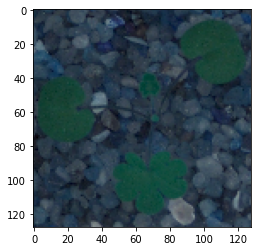

label:  Fat Hen


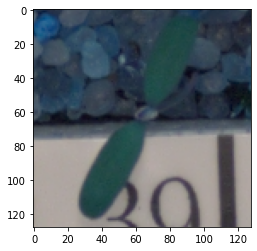

label:  Common wheat


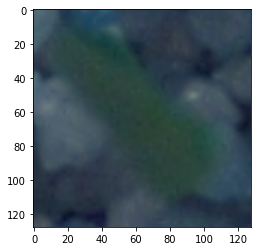

label:  Charlock


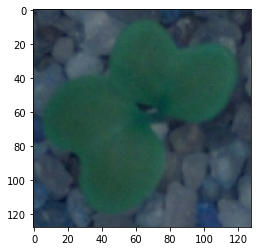

label:  Scentless Mayweed


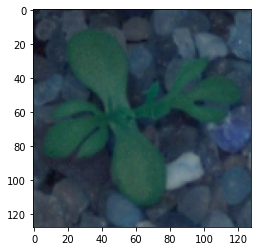

label:  Sugar beet


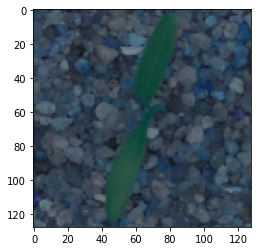

In [8]:
# Visulaizing some images, together with their label

for i in range (1, 4200, 700):
  print('label: ', labels['Label'][i])
  plt.imshow(img_array[i], cmap='gray')
  plt.show()

#### Checking how are 12 different classes are distribituted in the dataset

In [9]:
class_weights=pd.DataFrame(labels['Label'].value_counts(normalize=True))
class_weights

,Label
Loose Silky-bent,0.137684
Common Chickweed,0.128632
Scentless Mayweed,0.108632
Small-flowered Cranesbill,0.104421
Fat Hen,0.100000
Charlock,0.082105
Sugar beet,0.081053
Cleavers,0.060421
Black-grass,0.055368
Shepherds Purse,0.048632


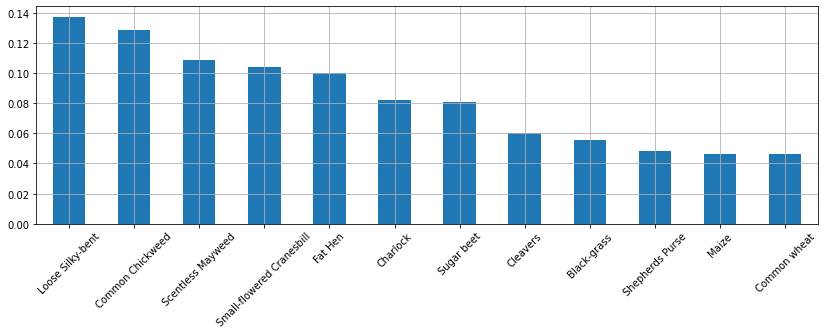

In [10]:
class_weights.Label.plot(kind='bar', grid=True, figsize=(14,4), rot=45)

#### The classes are unbalanced, so that 'class_weight' hyperparameter will be included under the model.fit()

#### Asigning x and y data:

In [11]:
x=img_array
y=np.array(labels.Label)
print(x.shape, y.shape)

(4750, 128, 128, 3) (4750,)


### Data Pre-processing
 - Normalization
 - Gaussian Blurring
 - Visualize data after pre-processing.

In [12]:
# Normalization

x = x.astype('float32') # Conversion to float type from integer type.
x /= 255.0 # Division by 255

In [13]:
x.shape

(4750, 128, 128, 3)

In [14]:
# Creating empty numpy array, which will be used to store the new values after applying Gaussian Blurring filter to the original images.

new_x = np.empty((4750, 128, 128, 3)) 
new_x.shape

(4750, 128, 128, 3)

In [15]:
x[0].shape

(128, 128, 3)

In [16]:
# Iterating through each row, and converting to an array of 128x128 pixels 3-D array. 
for idx, line in enumerate(x):
  new_x[idx] = line.reshape((128, 128, 3))

new_x[0].shape

(128, 128, 3)

label:  Small-flowered Cranesbill


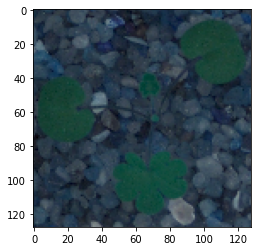

label:  Fat Hen


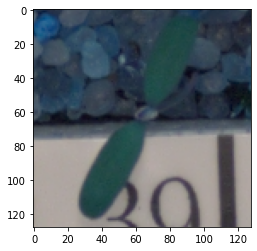

label:  Common wheat


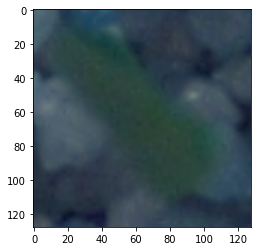

label:  Charlock


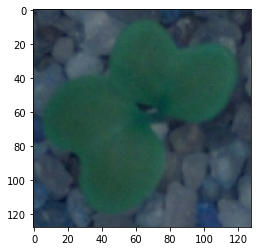

label:  Scentless Mayweed


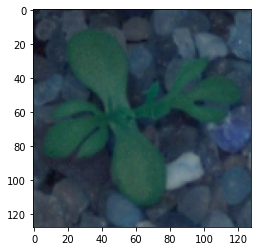

label:  Sugar beet


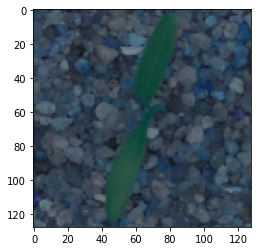

In [17]:
# Checking data identity after populating new_x to the original x set:

for i in range (1, 4200, 700):
  print('label: ', labels['Label'][i])
  plt.imshow(new_x[i], cmap='gray')
  plt.show()

In [18]:
print(new_x.shape, len(new_x))

(4750, 128, 128, 3) 4750


label:  Small-flowered Cranesbill


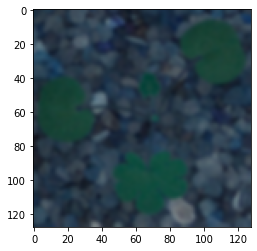

label:  Fat Hen


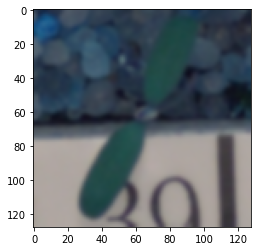

label:  Common wheat


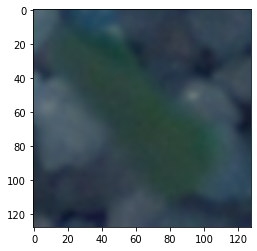

label:  Charlock


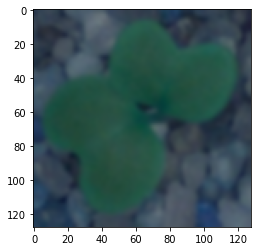

label:  Scentless Mayweed


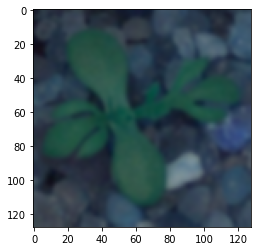

label:  Sugar beet


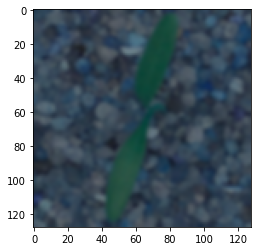

In [19]:
# Applying the gaussian blur to each 128x128 pixels array (image) to reduce the noise in the image

for idx, img in enumerate(new_x):
  new_x[idx] = cv2.GaussianBlur(img, (5, 5), 0)

# Re-ploting the de-noised image generated by applying Gaussian blur.

for i in range (1, 4200, 700):
  print('label: ', labels['Label'][i])
  plt.imshow(new_x[i], cmap='gray')
  plt.show()

### Data compatibility for modeling
 - Converting labels to one-hot-vectors.
 - Printing the label for y_train[0].
 - Spliting the dataset into training, testing, and validation set.
 - Checking the shape of data, reshaping if needed

In [20]:
# Convert labels to one hot vectors - one way from the many (keras.utils.to_categorical; sklearn.preprocessing.OneHotEncoder; pandas get_dummies).

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y = enc.fit_transform(y)

y[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [21]:
crop_classes=pd.DataFrame(enc.classes_)
crop_classes.rename(columns={0:'class_label'}, inplace=True)
crop_classes.reset_index(inplace=True)

In [22]:
crop_classes

,index,class_label
0,0,Black-grass
1,1,Charlock
2,2,Cleavers
3,3,Common Chickweed
4,4,Common wheat
5,5,Fat Hen
6,6,Loose Silky-bent
7,7,Maize
8,8,Scentless Mayweed
9,9,Shepherds Purse


In [23]:
class_weights.reset_index(inplace=True)
class_weights.rename(columns={'index':'class_label'}, inplace=True)
class_weights

,class_label,Label
0,Loose Silky-bent,0.137684
1,Common Chickweed,0.128632
2,Scentless Mayweed,0.108632
3,Small-flowered Cranesbill,0.104421
4,Fat Hen,0.100000
5,Charlock,0.082105
6,Sugar beet,0.081053
7,Cleavers,0.060421
8,Black-grass,0.055368
9,Shepherds Purse,0.048632


In [24]:
classes=class_weights.merge(crop_classes, on='class_label')
classes.rename(columns={'index':'class_number'}, inplace=True)
classes

,class_label,Label,class_number
0,Loose Silky-bent,0.137684,6
1,Common Chickweed,0.128632,3
2,Scentless Mayweed,0.108632,8
3,Small-flowered Cranesbill,0.104421,10
4,Fat Hen,0.100000,5
5,Charlock,0.082105,1
6,Sugar beet,0.081053,11
7,Cleavers,0.060421,2
8,Black-grass,0.055368,0
9,Shepherds Purse,0.048632,9


In [25]:
classes['weights']=1-classes['Label']
classes['norm_weights']=classes['weights']/sum(classes['weights'])
classes

,class_label,Label,class_number,weights,norm_weights
0,Loose Silky-bent,0.137684,6,0.862316,0.078392
1,Common Chickweed,0.128632,3,0.871368,0.079215
2,Scentless Mayweed,0.108632,8,0.891368,0.081033
3,Small-flowered Cranesbill,0.104421,10,0.895579,0.081416
4,Fat Hen,0.100000,5,0.900000,0.081818
5,Charlock,0.082105,1,0.917895,0.083445
6,Sugar beet,0.081053,11,0.918947,0.083541
7,Cleavers,0.060421,2,0.939579,0.085416
8,Black-grass,0.055368,0,0.944632,0.085876
9,Shepherds Purse,0.048632,9,0.951368,0.086488


In [26]:
sum(classes['norm_weights'])

1.0

In [27]:
classes.class_number.dtype

dtype('int64')

In [28]:
class_dict=dict(zip(classes.class_number.to_list(), classes.norm_weights.to_list()))
class_dict

{0: 0.08587559808612438,
 1: 0.08344497607655502,
 2: 0.08541626794258372,
 3: 0.07921531100478467,
 4: 0.08667942583732056,
 5: 0.0818181818181818,
 6: 0.07839234449760764,
 7: 0.08667942583732056,
 8: 0.0810334928229665,
 9: 0.08648803827751195,
 10: 0.08141626794258372,
 11: 0.08354066985645932}

In [29]:
print(new_x.shape, y.shape)

(4750, 128, 128, 3) (4750, 12)


In [30]:
new_x.shape[1:]

(128, 128, 3)

In [31]:
# Printing the shape of dataset.

x_train, x_test, y_train, y_test = train_test_split(new_x, y, test_size=0.2, stratify=y, random_state=99)

x1_train, x_valid, y1_train, y_valid = train_test_split(x_train, y_train, train_size=0.75, stratify=y_train, random_state=99)

print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x1_train.shape[0], 'train samples')
print(x_valid.shape[0], 'validation samples')
print(x_test.shape[0], 'test samples')

x_train shape: (3800, 128, 128, 3)
y_train shape: (3800, 12)
2850 train samples
950 validation samples
950 test samples


##### There is no need to reshape the train, validation and test sets, since they are already at the compatible reshape, which would be:
 - x_train.reshape(x_train.shape[0], 128, 128, 3): number of rows --> width_pixels, height_pixels --> 3 color RGB channels. Same would apply for the x_test, and x_valid

### Building CNN
 - Defining layers.
 - Seting optimizer and loss function. (Adam optimizer and categorical crossentropy.)
---
##### Convolutional input layer, 32 feature maps with a size of 3×3 and a rectifier activation function.
- Batch Normalization Layer.
- Max Pool layer with size 2×2.
- Dropout layer at 20%.

##### Convolutional layer, 32 feature maps with a size of 3×3 and a rectifier activation function.
- Batch Normalization layer.
- Max Pool layer with size 2×2.
- Dropout layer at 30%.

##### Convolutional layer, 64 feature maps with a size of 5×5 and a rectifier activation function.
- Batch Normalization layer.
- Max Pool layer with size 2×2.
- Dropout layer at 40%.

##### Convolutional layer, 128 feature maps with a size of 7×7 and a rectifier activation function.
- Batch Normalization layer.
- Max Pool layer with size 2×2.
- Dropout layer at 50%.
---
- GlobalMaxPooling2D layer.
---
##### Fully connected layer with 512 units and a rectifier activation function.
- Dropout layer at 50%.
- Fully connected output layer with 12 units and a softmax activation function.


In [32]:
# Input shape of the data
print(x_train.shape[1:], x1_train.shape[1:])

(128, 128, 3) (128, 128, 3)


In [33]:
layers.MaxPooling2D

tensorflow.python.keras.layers.pooling.MaxPooling2D

In [34]:
# Seting the number of classes to predict, epochs, and number of final predictions for demo

num_classes = 12
epochs = 80
num_predictions = 5

In [35]:
# CNN model

batch_size = None

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), padding='same', activation="relu", input_shape=x_train.shape[1:]))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(32, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (5, 5), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))

model.add(layers.Conv2D(128, (7, 7), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.GlobalMaxPooling2D())

model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(12, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0

In [36]:
# Initializing Adam optimizer
opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [37]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
#Adding Model Checkpoint callback to the fit function 

# model_checkpoint =  ModelCheckpoint('crop_seeding_cnn_checkpoint_{epoch:02d}_loss{loss:.4f}.h5',
#                                                            monitor='loss',
#                                                            verbose=0,
#                                                            save_best_only=True,
#                                                            save_weights_only=True,
#                                                            mode='auto',
#                                                            save_freq=1)

In [38]:
#Confirming the data shapes

print(x1_train.shape)
print(x_valid.shape)
print(x_test.shape)

(2850, 128, 128, 3)
(950, 128, 128, 3)
(950, 128, 128, 3)


### Fiting and evaluating the model

-  100 epochs, without a batch size (applying batch sizes decreased the model score, since the number of rows is relatively small for training typical CNN).

In [39]:
history = model.fit(x1_train,
                    y1_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    class_weight=class_dict,
                    validation_data=(x_valid, y_valid),
                    shuffle=True,
                    verbose=1)
#                    callbacks=[model_checkpoint])


Epoch 1/80
90/90 [==============================] - 37s 42ms/step - loss: 0.3637 - accuracy: 0.1817 - val_loss: 3.1436 - val_accuracy: 0.1379
Epoch 2/80
90/90 [==============================] - 3s 30ms/step - loss: 0.1480 - accuracy: 0.3869 - val_loss: 4.3668 - val_accuracy: 0.1379
Epoch 3/80
90/90 [==============================] - 3s 30ms/step - loss: 0.1174 - accuracy: 0.5061 - val_loss: 5.6824 - val_accuracy: 0.1568
Epoch 4/80
90/90 [==============================] - 3s 29ms/step - loss: 0.1051 - accuracy: 0.5796 - val_loss: 4.1148 - val_accuracy: 0.1400
Epoch 5/80
90/90 [==============================] - 3s 29ms/step - loss: 0.1071 - accuracy: 0.5752 - val_loss: 3.9661 - val_accuracy: 0.1389
Epoch 6/80
90/90 [==============================] - 3s 29ms/step - loss: 0.0906 - accuracy: 0.6308 - val_loss: 3.9412 - val_accuracy: 0.1516
Epoch 7/80
90/90 [==============================] - 3s 29ms/step - loss: 0.0855 - accuracy: 0.6411 - val_loss: 4.4611 - val_accuracy: 0.2116
Epoch 8/80
9

In [40]:
# saving model history into a dataframe

history_model_1  = pd.DataFrame.from_dict(history.history)
history_model_1['epoch'] = history_model_1.index + 1
history_model_1 = history_model_1.melt(id_vars=['epoch'])
history_model_1.head()


,epoch,variable,value
0,1,loss,0.242624
1,2,loss,0.139078
2,3,loss,0.115363
3,4,loss,0.101990
4,5,loss,0.102174


In [41]:
model_save_path = "/content/drive/My Drive/ML_UT/CNN/project_plants_CNN/history_1.csv"
history_model_1.to_csv(model_save_path)

In [42]:
#Interactive plot, may not show up on the .ipynb file - open with a google colab

fig = px.scatter(history_model_1.query("'loss' in variable or 'val_loss' in variable"), x="epoch", y="value", 
              color="variable", hover_name="variable",
        render_mode="svg")
fig.data[0].update(mode='markers+lines')
fig.data[1].update(mode='markers+lines')
fig.show()

In [43]:
#Interactive plot, may not show up on the .ipynb file - open with a google colab

fig = px.scatter(history_model_1.query("'accuracy' in variable or 'val_accuracy' in variable"), x="epoch", y="value", 
              color="variable", hover_name="variable",
        render_mode="svg")
fig.data[0].update(mode='markers+lines')
fig.data[1].update(mode='markers+lines')
fig.show()

### Model Score:

- Evaluating on the test dataset

In [44]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

30/30 [==============================] - 0s 10ms/step - loss: 0.2913 - accuracy: 0.9053
Test loss: 0.2913254499435425
Test accuracy: 0.9052631855010986


In [45]:
#saving model weights

model.save('./classifier_1.h5')                     

model.save_weights('./classifier_1_weights.h5')  

### Confusion matrix

 - Prediction of classes and inverse encoding of y for the <b> test set </b>.

In [46]:
predicted_classes = model.predict(x_test)

predicted_classes.shape, y_test.shape

((950, 12), (950, 12))

In [47]:
#Making predictions

y_pred=enc.inverse_transform(predicted_classes)
y_pred[0:5]

array(['Loose Silky-bent', 'Scentless Mayweed', 'Scentless Mayweed',
       'Loose Silky-bent', 'Fat Hen'], dtype='<U25')

In [48]:
#Getting unique class names

num_classes = enc.classes_
num_classes

array(['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed',
       'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize',
       'Scentless Mayweed', 'Shepherds Purse',
       'Small-flowered Cranesbill', 'Sugar beet'], dtype='<U25')

In [49]:
#Inverse encode y to get labels back

y_test_class=enc.inverse_transform(y_test)
y_test_class[0:5]

array(['Loose Silky-bent', 'Scentless Mayweed', 'Scentless Mayweed',
       'Black-grass', 'Fat Hen'], dtype='<U25')

In [50]:
#Printing classification matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test_class, y_pred, target_names=num_classes))

                           precision    recall  f1-score   support

              Black-grass       0.70      0.58      0.64        53
                 Charlock       0.98      0.78      0.87        78
                 Cleavers       0.86      0.95      0.90        58
         Common Chickweed       1.00      0.96      0.98       122
             Common wheat       0.83      0.91      0.87        44
                  Fat Hen       0.96      0.96      0.96        95
         Loose Silky-bent       0.83      0.92      0.87       131
                    Maize       1.00      0.80      0.89        44
        Scentless Mayweed       0.89      0.99      0.94       103
          Shepherds Purse       0.86      0.83      0.84        46
Small-flowered Cranesbill       0.90      0.98      0.94        99
               Sugar beet       0.99      0.94      0.96        77

                 accuracy                           0.91       950
                macro avg       0.90      0.88      0.89    

In [51]:
predicted_classes[0]

array([4.7539983e-02, 3.8892040e-08, 4.7562362e-04, 7.2737277e-04,
       1.3197353e-01, 2.2405159e-04, 8.1833267e-01, 1.5193313e-05,
       1.4020309e-04, 1.0664837e-06, 5.4498692e-04, 2.5182451e-05],
      dtype=float32)

In [52]:
y_pred_hot = np.argmax(predicted_classes, axis=1)

y_test_hot=np.argmax(y_test, axis=1)

print(y_pred_hot[0], y_test_hot[0])

6 6


In [53]:
#confusion matrix
test_results = pd.DataFrame(zip(y_pred_hot, y_test_hot), columns=['y_pred', 'y_true'])
test_results.head()


,y_pred,y_true
0,6,6
1,8,8
2,8,8
3,6,0
4,5,5


In [54]:
conf_mat = confusion_matrix(test_results['y_true'], test_results['y_pred'])
conf_mat

array([[ 31,   0,   0,   0,   0,   0,  21,   0,   1,   0,   0,   0],
       [  0,  61,   9,   0,   0,   2,   0,   0,   0,   3,   3,   0],
       [  0,   1,  55,   0,   2,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 117,   0,   0,   0,   0,   1,   2,   2,   0],
       [  2,   0,   0,   0,  40,   0,   2,   0,   0,   0,   0,   0],
       [  1,   0,   0,   0,   1,  91,   0,   0,   0,   0,   2,   0],
       [ 10,   0,   0,   0,   0,   0, 121,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   2,   1,   1,  35,   0,   0,   4,   1],
       [  0,   0,   0,   0,   0,   0,   1,   0, 102,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   8,  38,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1,   1,  97,   0],
       [  0,   0,   0,   0,   3,   1,   0,   0,   1,   0,   0,  72]])

In [62]:
y_test_df=pd.DataFrame(y_test_class)
y_test_df.rename(columns={0:'plant_class'}, inplace=True)
y_test_df['plant_class'].value_counts()

Loose Silky-bent             131
Common Chickweed             122
Scentless Mayweed            103
Small-flowered Cranesbill     99
Fat Hen                       95
Charlock                      78
Sugar beet                    77
Cleavers                      58
Black-grass                   53
Shepherds Purse               46
Maize                         44
Common wheat                  44
Name: plant_class, dtype: int64

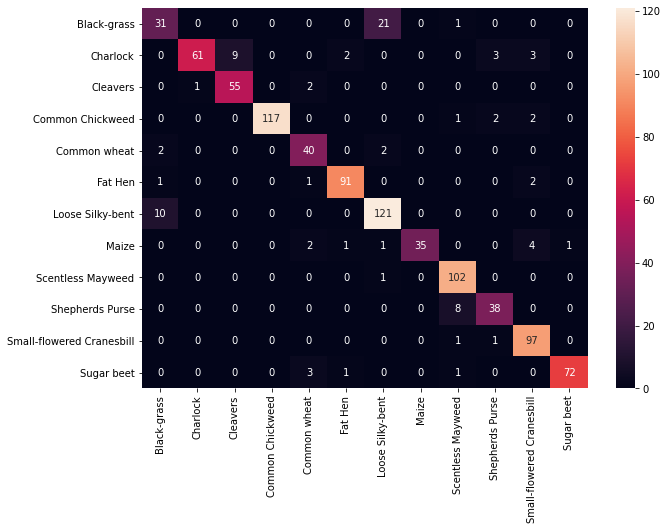

In [55]:
df_cm = pd.DataFrame(conf_mat, index =  enc.classes_,
                  columns = enc.classes_)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g');

 - Overall model accuracy is 90%. 
 - Confusion matrix showed lower precision and reacll scores for Black-grass type, which is visually similar to Loose Silky-bent, slightly confusing between these two types. 
 - Other classes are predicted with good precision and recall scores.

### Visualizing predictions for:
 - x_test[2], x_test[3], x_test[33], x_test[36], x_test[59] - Evaluation set

In [56]:
index=[2, 3, 33, 36, 59]
x_eval=new_x[index]
actual_label=np.array(labels['Label'][index])

#Making predictions for evaluation set

predicted_eval = model.predict(x_eval)

y_eval=enc.inverse_transform(predicted_eval)
y_eval

array(['Small-flowered Cranesbill', 'Small-flowered Cranesbill',
       'Small-flowered Cranesbill', 'Small-flowered Cranesbill',
       'Small-flowered Cranesbill'], dtype='<U25')

actual label:  Small-flowered Cranesbill
predicted label:  Small-flowered Cranesbill


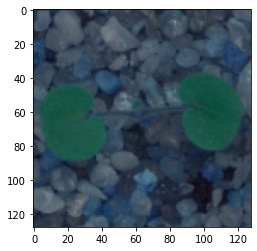

actual label:  Small-flowered Cranesbill
predicted label:  Small-flowered Cranesbill


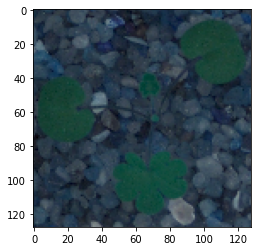

actual label:  Small-flowered Cranesbill
predicted label:  Small-flowered Cranesbill


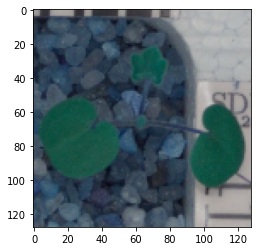

actual label:  Small-flowered Cranesbill
predicted label:  Small-flowered Cranesbill


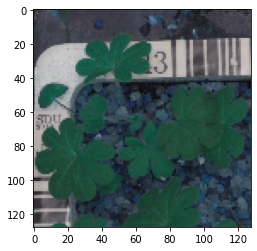

actual label:  Small-flowered Cranesbill
predicted label:  Small-flowered Cranesbill


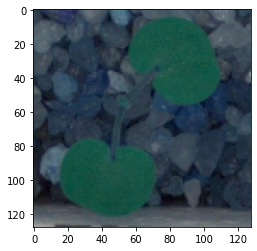

In [57]:

for i in range(0, num_predictions):
  print('actual label: ', actual_label[i])
  print('predicted label: ', y_eval[i])
  plt.imshow(img_array[i], cmap='gray')
  plt.show()

 - Predicted labels are as the actual for this small evaluation set, consisting of one class only.

### Summary:

 - Image classifier was successfully built with the overal test accuracy of 90%.
 - Incresaing the data set would likely increase the overal model performance (4750 images is relatively small for typical CNN).
 - Including 'class_weight' for unbalanced dataset helps to decrease the model complexity and save computational time.
 - There is still room for improvement in terms of model's hyperparameters tuning, such as number of features maps in the Convolutional layers, layers droputs and number of neurons in FCC.
